Napisz symulację ewolucji według poniższych założeń i odpowiedz na pytania.
Symulacja rozpoczyna się z 10 stworzonkami, które mają jedną unikalną właściwość (i.e. każdy ma 
zdefiniowaną ją indywidualne) - kolor. 5 stworzonek jest niebieskich, 5 stworzonek jest czerwonych. 
Symulacja powinna toczyć się przez 100 dni, w którym każdego dnia stworzenie ma 10% szans na śmierć.

# Zadanie 1

**Zad. 1.** Każdego dnia stworzonka łączą się w losowe pary - każdego dnia inne - i mają x% procent szans na 
rozmnożenie się (z każdej pary powstaje 1 stworzenie losowego koloru).
Przeprowadź symulację i odpowiedź na następujące pytania:

a) Jak wielkość parametru x wpływa na liczebność grupy po 100 iteracjach.

b) Jak modyfikacje parametru śmiertelności wpływają na liczebność grup

c) Wskaż trzy najciekawsze wnioski z przebiegu eksperymentu.


In [215]:
#importing the necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import itertools

In [216]:
def evolution_simulation(n,chance_of_death,chance_of_reproduction): # n-number of days (number of loops)

  import random

  red_end=[0,0,0,0,0]  # zeros represent red creatures
  blue_end=[1,1,1,1,1] # ones represent blue creatures 

  for i in range(n):

    for r in red_end:
      if random.random() <= chance_of_death: # checking the chance of an event occurring
          red_end.remove(r)
    for b in blue_end:
      if random.random() <= chance_of_death:
          blue_end.remove(b)

    join_lists=blue_end+red_end
    random.shuffle(join_lists) 
    random_pairs=[join_lists[i:i + 2] for i in range(0, len(join_lists), 2)] # creating list of random pairs

    if (len(join_lists) % 2) == 0: #checks if each creature has a pair
      for i in range(len(random_pairs)):
        if random.random() <= chance_of_reproduction:
          if random.randint(0, 1)==1:   #randomly chooses what colour the babies will be
            red_end.append(0)
          else:
            blue_end.append(1)
    else:
      for i in range(len(random_pairs)-1):
        if random.random() <= chance_of_reproduction:
          if random.randint(0, 1)==1:  
            red_end.append(0)
          else:
            blue_end.append(1)

  red = len(red_end)
  blue = len(blue_end)
  all=red+blue

  return red, blue, all
     


In [217]:
evolution_simulation(100,0.1,0.4)

(30092, 30132, 60224)

In [218]:
list_of_death=np.arange(0.01, 0.51, 0.01).tolist() #list of chances from 1% to 50% 
list_of_life=np.arange(0.01,0.51, 0.01).tolist()

In [227]:
death_score = []
chance_of_reproduction=0.5
n=50
for option_death in list_of_death: #creates a list of population values depending on the chances
    score=evolution_simulation(n,option_death,chance_of_reproduction)
    death_score.append(score)
death_score=np.array(death_score) 

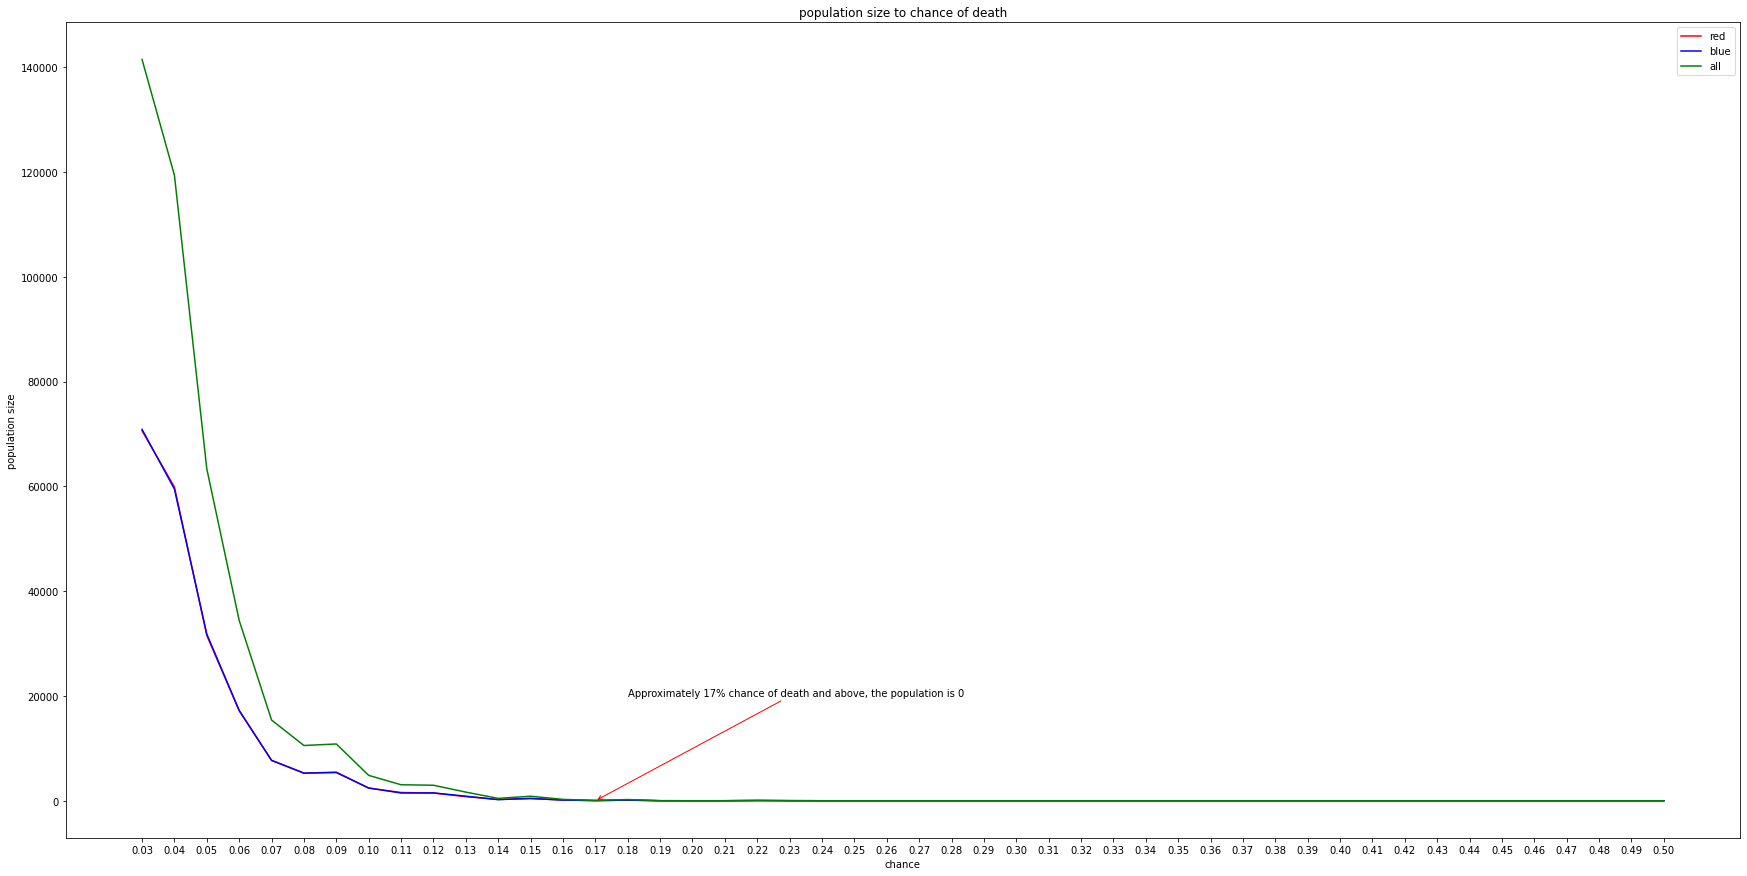

In [228]:
plt.figure(figsize=(30, 15))
plt.plot(list_of_life[2:], death_score[2:,0], label="red",color= 'r')
plt.plot(list_of_life[2:], death_score[2:,1], label="blue",color='b')
plt.plot(list_of_life[2:], death_score[2:,2], label="all",color='g')
plt.xlabel("chance")
plt.xticks(np.arange(0.03, 0.51, 0.01).tolist())
plt.ylabel("population size")
plt.title("population size to chance of death")
plt.legend(loc='best')
plt.annotate('Approximately 17% chance of death and above, the population is 0', xy=(0.17,0),
              xytext=(0.18,20000),
              arrowprops={"arrowstyle":"->","color":"red"})

plt.show()

Jak widzimy na wykresie parametr śmierdelności ma wąski zakres i jest bardzo wrażliwy na najmniejsze zmiany. Gdy mamy około 17% szans na śmiertelność i wiecej, jest wielce prawdopodobne, że populacja nie przetrwa.

In [229]:
life_score = []
chance_of_death = 0.1
n=50
for option_life in list_of_life:
    score=evolution_simulation(n,chance_of_death,option_life)
    life_score.append(score)
life_score=np.array(life_score) 

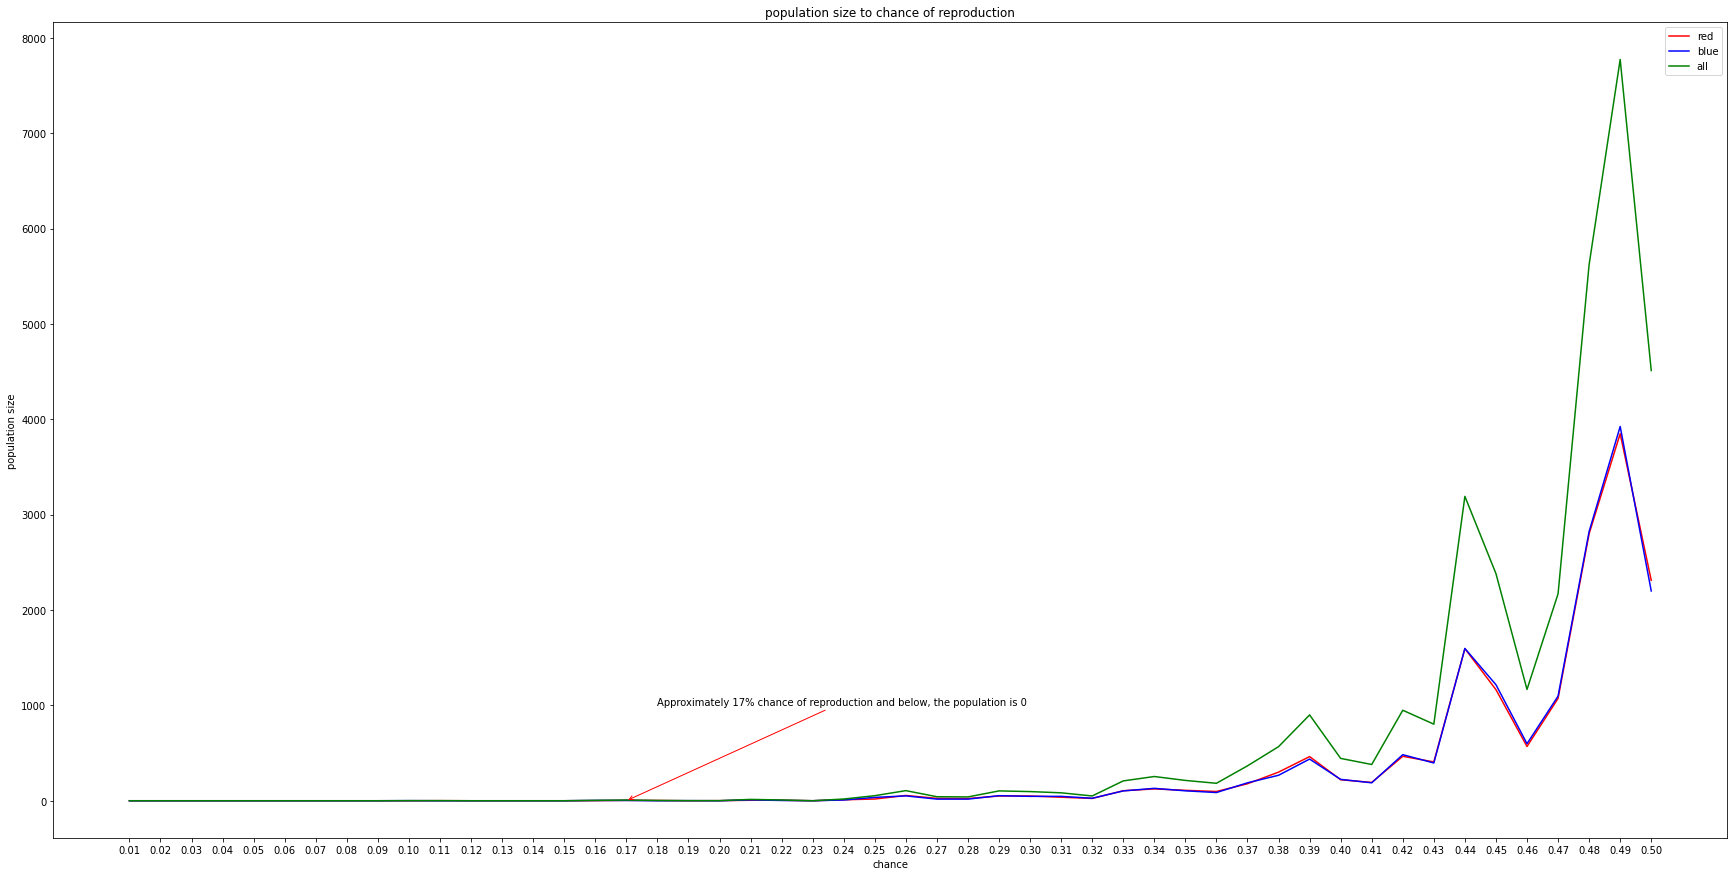

In [230]:
plt.figure(figsize=(30, 15))
plt.plot(list_of_life[:], life_score[:,0], label="red",color= 'r')
plt.plot(list_of_life[:], life_score[:,1], label="blue",color='b')
plt.plot(list_of_life[:], life_score[:,2], label="all",color='g')
plt.xlabel("chance")
plt.xticks(np.arange(0.01, 0.51, 0.01).tolist())
plt.ylabel("population size")
plt.title("population size to chance of reproduction")
plt.legend(loc='best')
plt.annotate('Approximately 17% chance of reproduction and below, the population is 0', xy=(0.17,0),
             xytext=(0.18,1000),
             arrowprops={"arrowstyle":"->","color":"red"})

plt.show()

Z kolei na tym wykresie widać przeciwną sytuacje do parametru śmierci. Parametr reprodukcji ma większą rozpiętość bo od około 17% do 100% by zachować jakąkolwiek liczebność populacji dla śmiertelności o szansie 10%. Dodatkowo można wywnioskować ze parametr śmiertelności bardziej wpływa na liczebnosć grupy bo drobne zmiany w kierunku zmniejszenia parametru mocno podbijają wielkosć grup.

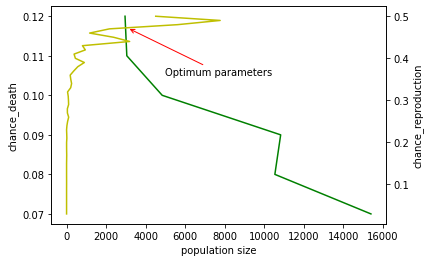

In [231]:
fig, ax = plt.subplots()
ax.plot(death_score[6:12,2], list_of_life[6:12], label="all_death",color='g')
ax.set_xlabel("population size")
ax.set_ylabel("chance_death")

ax2=ax.twinx()
ax2.plot(life_score[2:,2], list_of_life[2:], label="all_life",color='y')
ax2.set_ylabel("chance_reproduction")

ax.annotate('Optimum parameters', xy=(3100,0.117),
              xytext=(5000,0.105),
              arrowprops={"arrowstyle":"->","color":"red"})

plt.show()

Po tym wykresie można oszacować, że optymalne wartości paratrów to odpowiednio 11,5% dla śmierci oraz 45% dla szansy na narodziny. Powinno to zapewnić stabilny rozówj dla 2 grup. 

In [232]:
pair_list=[]

for pair in itertools.product(list_of_death, list_of_life):
  pair_list.append(pair)

pair_score = []
pair_List_string =[]

n=30
for option_death, option_life in pair_list:
    score=(evolution_simulation(n,option_death,option_life))
    pair_score.append(score)
    pair_List_string.append(str(round(option_death,2))+"_"+str(round(option_life,2)))
pair_score=np.array(pair_score)   

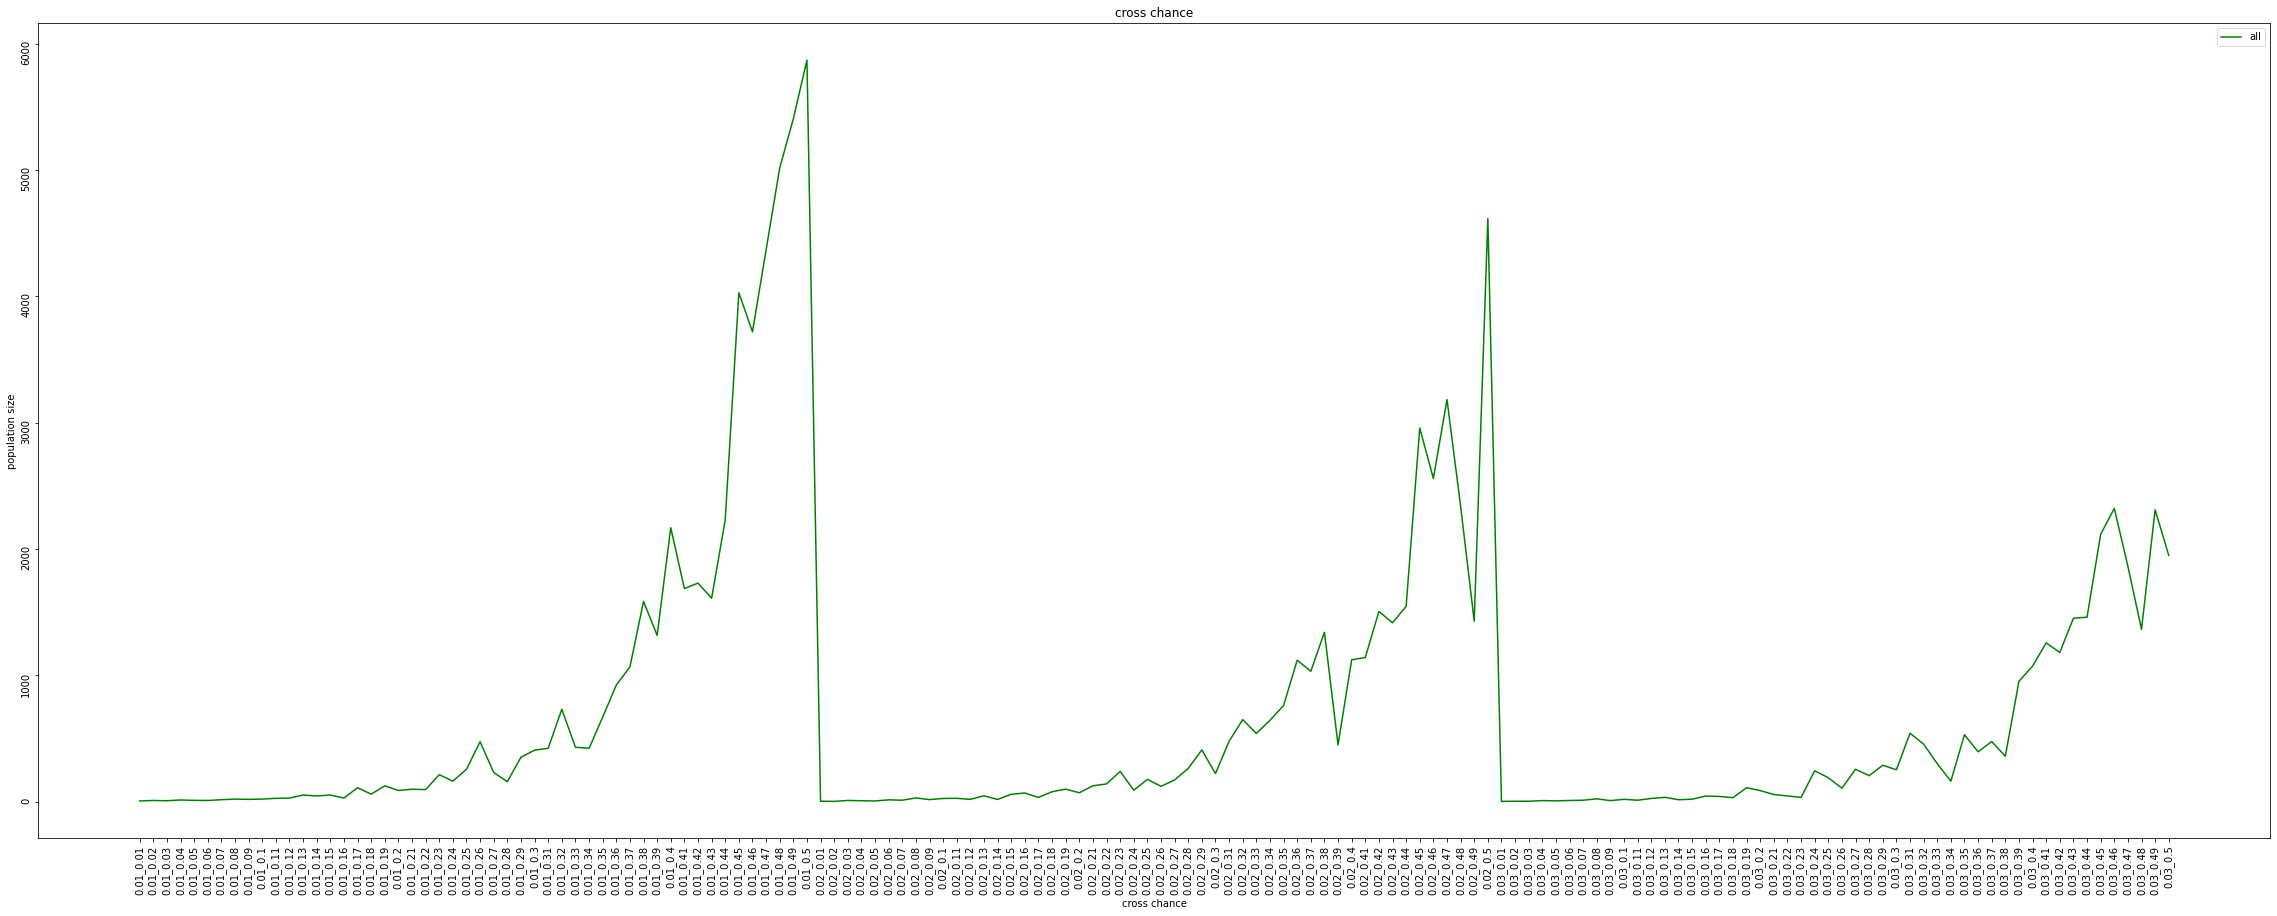

In [233]:
plt.figure(figsize=(40, 15))
plt.plot(pair_List_string[:150], pair_score[:150,2], label="all",color='g')
plt.xlabel("cross chance")
plt.ylabel("population size")
plt.title("cross chance")
plt.legend(loc='best')
plt.tick_params(rotation=90)

plt.show()

Po tym wykresie widać coś czego mopzna było sie spodziewać od poczatku ze im niejsza szansa na śmierć i im większa szansa na narodziny tym populacja bedzie największa. 

# **Podsumowanie zadania 1**
Parametr x czyli parametr rozmnażania zdecydowanie im większy tym tym większe tym liczebność grup rośnie, do około od 0 do około 17 % prwaie wcale nie wpływa na powiększanie sie grupy. Zdecydowany przyrost zaczynai zaczyna sie gdzies od około 45% wartości tego parametru, przy stałym parametrze śmiertelności. 

Parametr śmiertelności w bardzo wąskim zakresie pozwala na przyrost populacji, od 0 do około 17%. Populacja jest bardzo wrażliwa na jego wachania w tym przedziale. Dla wartości ponad 17% jest wielce prawdopodobne ze populacje wyginie. 

3 najciekawsze wnioski to:
- Obydwa parametry bardzo istotnie sie od siebie różnią mimo ze mogło sie wydawać ze bedą do siebei dość podobne w tej symulacji.
-Bardzo mocny wpływ parametru śmiertelności na liczebność.
-Drobne zmiany w parametrze reprodukcji nie mają tak istotnego wpływu szczególnie do 45% na zwiększanie sie populacji.


# Zadanie 2

**Zad 2.** Wybierz parametr śmiertelności i rozmnożenia się które twoim zdaniem gwarantuje optymalny 
rozwój grupy. Każdego dnia stworzonka łączą się w losowe pary - każdego dnia inne - i mają x% procent 
szansy na rozmnożenie się tylko pod warunkiem, że ich kolory są takie same.

a) Jak to wpłynęło na wyniki eksperymentu? Wskaż trzy kluczowe zmiany które w grupach spowodował 
ten element.

In [234]:
evolution_simulation(100,0.115,0.45)

(20377, 20314, 40691)

In [235]:
def evolution_simulation_2(n,chance_of_death,chance_of_reproduction):

  import random

  red_end=[0,0,0,0,0]
  blue_end=[1,1,1,1,1]

  for i in range(n):

    for r in red_end:
      if random.random() <= chance_of_death:
          red_end.remove(r)
    for b in blue_end:
      if random.random() <= chance_of_death:
          blue_end.remove(b)

    join_lists=blue_end+red_end
    random.shuffle(join_lists)
    random_pairs=[join_lists[i:i + 2] for i in range(0, len(join_lists), 2)]

    if (len(join_lists) % 2) == 0:
      for i in random_pairs:
        if random.random() <= chance_of_reproduction:
          if i[0] == i[1] == 0:  
            red_end.append(0)
          elif i[0] == i[1] == 1:
            blue_end.append(1)
          else: continue
    else:
      for i in random_pairs[:-1]:
        if random.random() <= chance_of_reproduction:
          if i[0] == i[1] == 0:  
            red_end.append(0)
          elif i[0] == i[1] == 1:
            blue_end.append(1)
          else: continue

  red = len(red_end)
  blue = len(blue_end)
  all=red+blue

  return red, blue, all  

In [240]:
evolution_simulation_2(100,0.115,0.45)

(17629, 0, 17629)

In [241]:
evo_1 = []
evo_2 = []
num_loops = []
n=20
for i in range(n):
    score=evolution_simulation(100,0.115,0.45)
    score2=evolution_simulation_2(100,0.115,0.45)
    evo_1.append(score)
    evo_2.append(score2)
    num_loops.append(i+1)

evo_1=np.array(evo_1) 
evo_2=np.array(evo_2) 

In [242]:
avg_evo_1 = np.average(evo_1[:,2])
avg_evo_2 = np.average(evo_2[:,2])
print(f"the average population size for {n} loops for simulation 1 is {avg_evo_1}")
print(f"the average population size for {n} loops for simulation 2 is {avg_evo_2}")


the average population size for 20 loops for simulation 1 is 104429.1
the average population size for 20 loops for simulation 2 is 19933.65


Zdecydowanie średnia dla pierwszej symulacji jest większa niż dla drugiej, wiec pierwsza symulacja zapewnia większą liczebność grup.

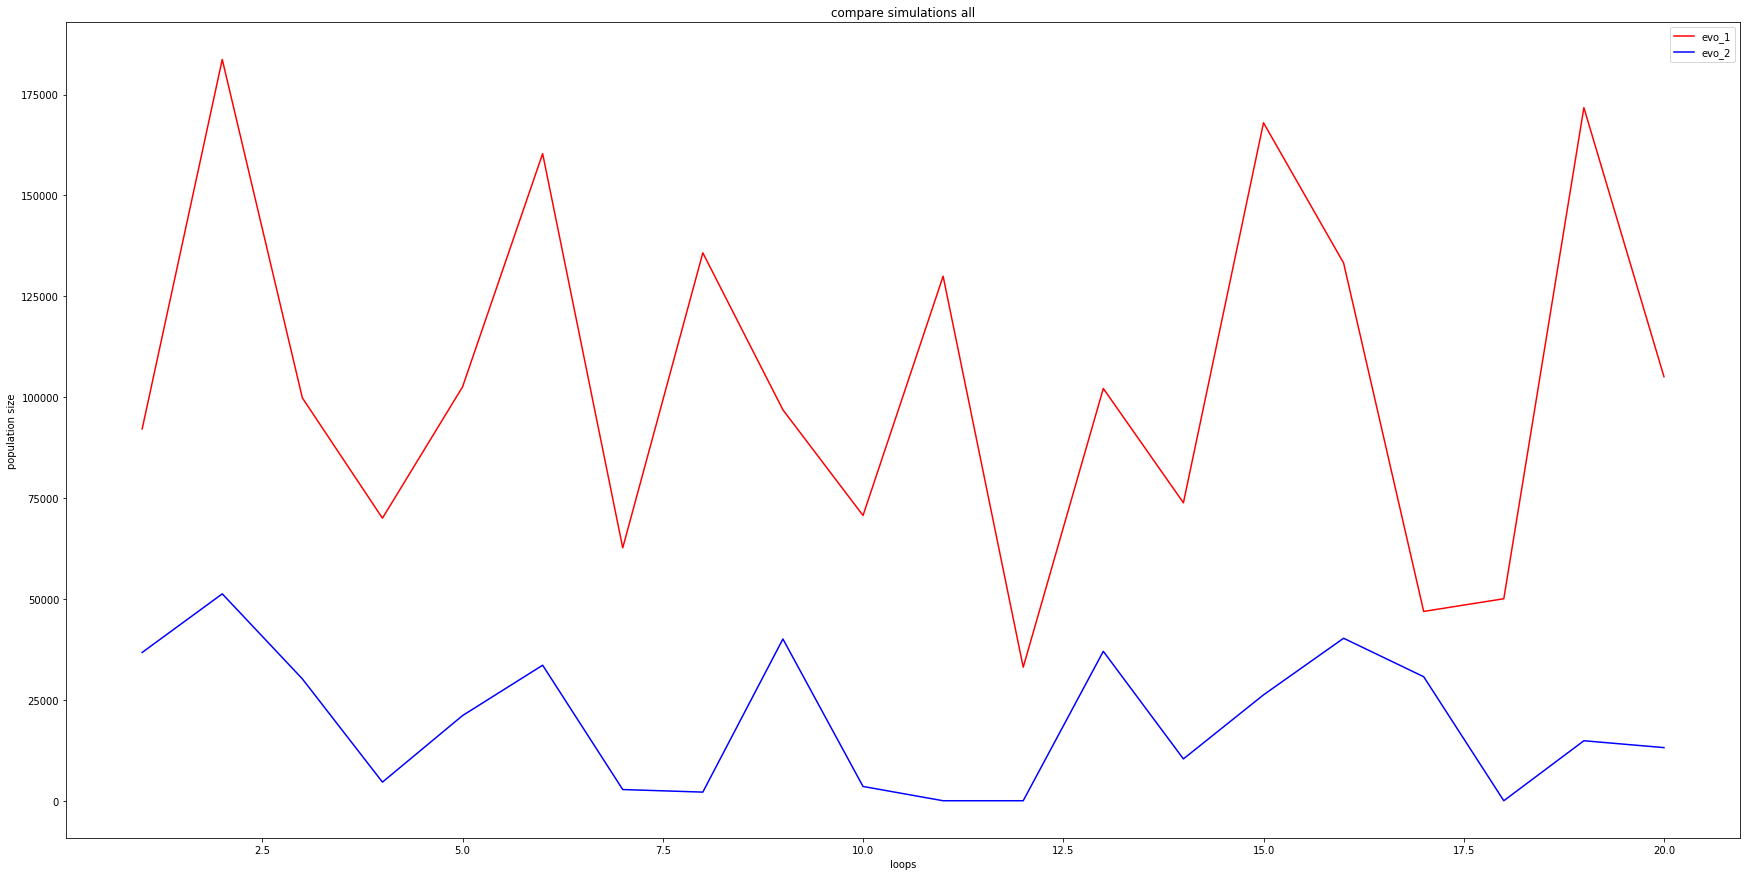

In [243]:
plt.figure(figsize=(30, 15))
plt.plot(num_loops[:], evo_1[:,2], label="evo_1",color= 'r')
plt.plot(num_loops[:], evo_2[:,2], label="evo_2",color='b')
plt.xlabel("loops")
plt.ylabel("population size")
plt.title("compare simulations all")
plt.legend(loc='best')


plt.show()

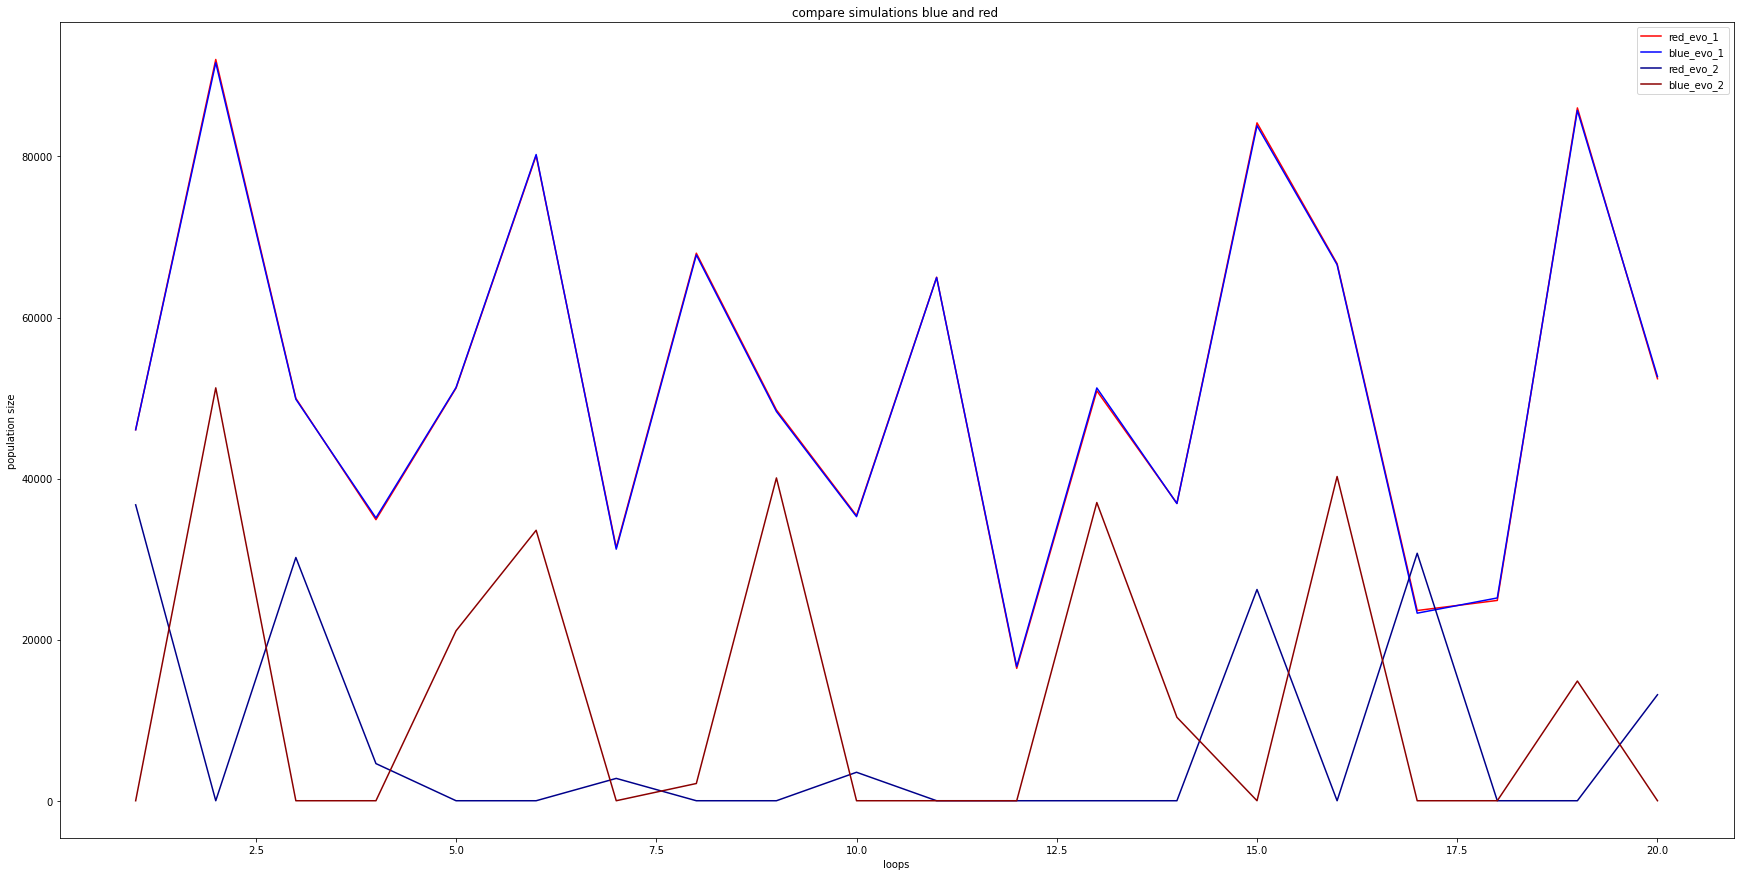

In [244]:
plt.figure(figsize=(30, 15))
plt.plot(num_loops[:], evo_1[:,0], label="red_evo_1",color= 'r')
plt.plot(num_loops[:], evo_1[:,1], label="blue_evo_1",color= 'b')
plt.plot(num_loops[:], evo_2[:,0], label="red_evo_2",color='darkblue')
plt.plot(num_loops[:], evo_2[:,1], label="blue_evo_2",color='darkred')
plt.xlabel("loops")
plt.ylabel("population size")
plt.title("compare simulations blue and red ")
plt.legend(loc='best')

plt.show()


Widać że dla pierwszej symulacji stworzenia czerwone i niebieskie mają prawie taki sam rozkłąd prawie po 50%. Dla drógiej symulacji zachodzi ciekawe zjawisko ze jedna grupa wypiera drógą albo dochodzi od wyzerowania obu grup. 

# **Podsumowanie zadania 2**
3 zmiany widoczne w symulacji drógie w stosunku do pierwszej:
- Populacja w drógiej symulacji jest o wiele mniejsza
- Zachodzi zjawisko ze jednen kolor jest w stanie wyprzeć drógi 
- Jest możliwe ze na koniec symulacji populacja wyniesie 0

# Zadanie 3

**Zad 3.** Wybierz parametr śmiertelności i rozmnożenia się które twoim zdaniem gwarantuje optymalny 
rozwój grupy. Każdego dnia stworzonka łączą się w losowe pary - każdego dnia inne - i jest gwarantowane 
że się rozmnożą jeśli ich kolory są podobne do siebie w y% procent (do kalkulacji różnic wykorzystaj 
reprezentacje kodu w RGB). Kolor potomstwa będzie średnią kolorów rodziców. Dodatkowo, potomstwo 
ma 15% szans ma mutacje - tzn. że kolor będzie zupełnie inny niż kolor rodziców (losowy).

A) Opisz co się dzieje z liczebnością grup w poszczególnych kolorach w zależności od parametru y. 
Szczególną uwagę zwróć na los mutantów.

B) Przeprowadź eksperyment dla parametrów które wg. Ciebie zapewniają optymalny rozwój grupy. 
Zwizualizuj rozkład kolorystyczny stworzonek na koniec eksperymentu.

Do tego zadania wykorzystałem wzór na podobieństwo kolorów na podstawie najniższej odległości Euklidesa.

Przydatne linki:

-[stackoverflow](https://stackoverflow.com/questions/9018016/how-to-compare-two-colors-for-similarity-difference)

-[dev.to](https://dev.to/tejeshreddy/color-difference-between-2-colours-using-python-182b)

-[Euclidean](https://en.wikipedia.org/wiki/Euclidean_distance)

In [245]:
def evolution_simulation_3(n,chance_of_death,chance_of_reproduction,chance_of_similarity): # added chance of colour similarity
  
  import random
  from math import sqrt

  join_lists=[[255, 0, 0],[255, 0, 0],[255, 0, 0],[255, 0, 0],[255, 0, 0], # initial list was changed from zero-one to RGB colour representations
              [0, 0, 255],[0, 0, 255],[0, 0, 255],[0, 0, 255],[0, 0, 255]]

  for i in range(n):

    for j in join_lists:
      if random.random() <= chance_of_death:
          join_lists.remove(j)

    random.shuffle(join_lists)
    random_pairs=[join_lists[i:i + 2] for i in range(0, len(join_lists), 2)]

    if (len(join_lists) % 2) == 0:
      for i in random_pairs:
        if random.random() <= chance_of_reproduction:
          if 1-(int(sqrt((i[0][0]-i[1][0])**2+(i[0][1]-i[1][1])**2+(i[0][2]-i[1][2])**2))/ #colour similarity formula
                int(sqrt((255)**2+(255)**2+(255)**2))) >= chance_of_similarity:
            if random.random() <= 0.15: # mutation 15% chance      
              join_lists.append([random.randint(0,255),
                                 random.randint(0,255),
                                 random.randint(0,255)])
            else:
              join_lists.append([(i[0][0]+i[1][0])//2,
                                 (i[0][1]+i[1][1])//2,
                                 (i[0][2]+i[1][2])//2])
    else:
      for i in random_pairs[:-1]:
        if random.random() <= chance_of_reproduction:
          if 1-(int(sqrt((i[0][0]-i[1][0])**2+(i[0][1]-i[1][1])**2+(i[0][2]-i[1][2])**2))/
                int(sqrt((255)**2+(255)**2+(255)**2))) >= chance_of_similarity:
            if random.random() <= 0.15:
              join_lists.append([random.randint(0,255),
                                 random.randint(0,255),
                                 random.randint(0,255)])
            else:
              join_lists.append([(i[0][0]+i[1][0])//2,
                                 (i[0][1]+i[1][1])//2,
                                 (i[0][2]+i[1][2])//2])
  
  red = []
  blue = []
  for i in join_lists: #counting how many reds and blues are left
    if i == [255, 0, 0]:
      red.append(i)
    elif i == [0, 0, 255]:
      blue.append(i)
    else: continue

  return len(red),len(blue),len(join_lists)

In [251]:
evolution_simulation_3(100,0.115,0.45,0.2)

(0, 0, 31392)

In [252]:
list_color_chance=np.arange(0.1,1,0.01).tolist()

list_evo_3 = []
for option_chance in list_color_chance:
    score=evolution_simulation_3(80,0.115,0.45,option_chance)
    list_evo_3.append(score)
list_evo_3=np.array(list_evo_3) 

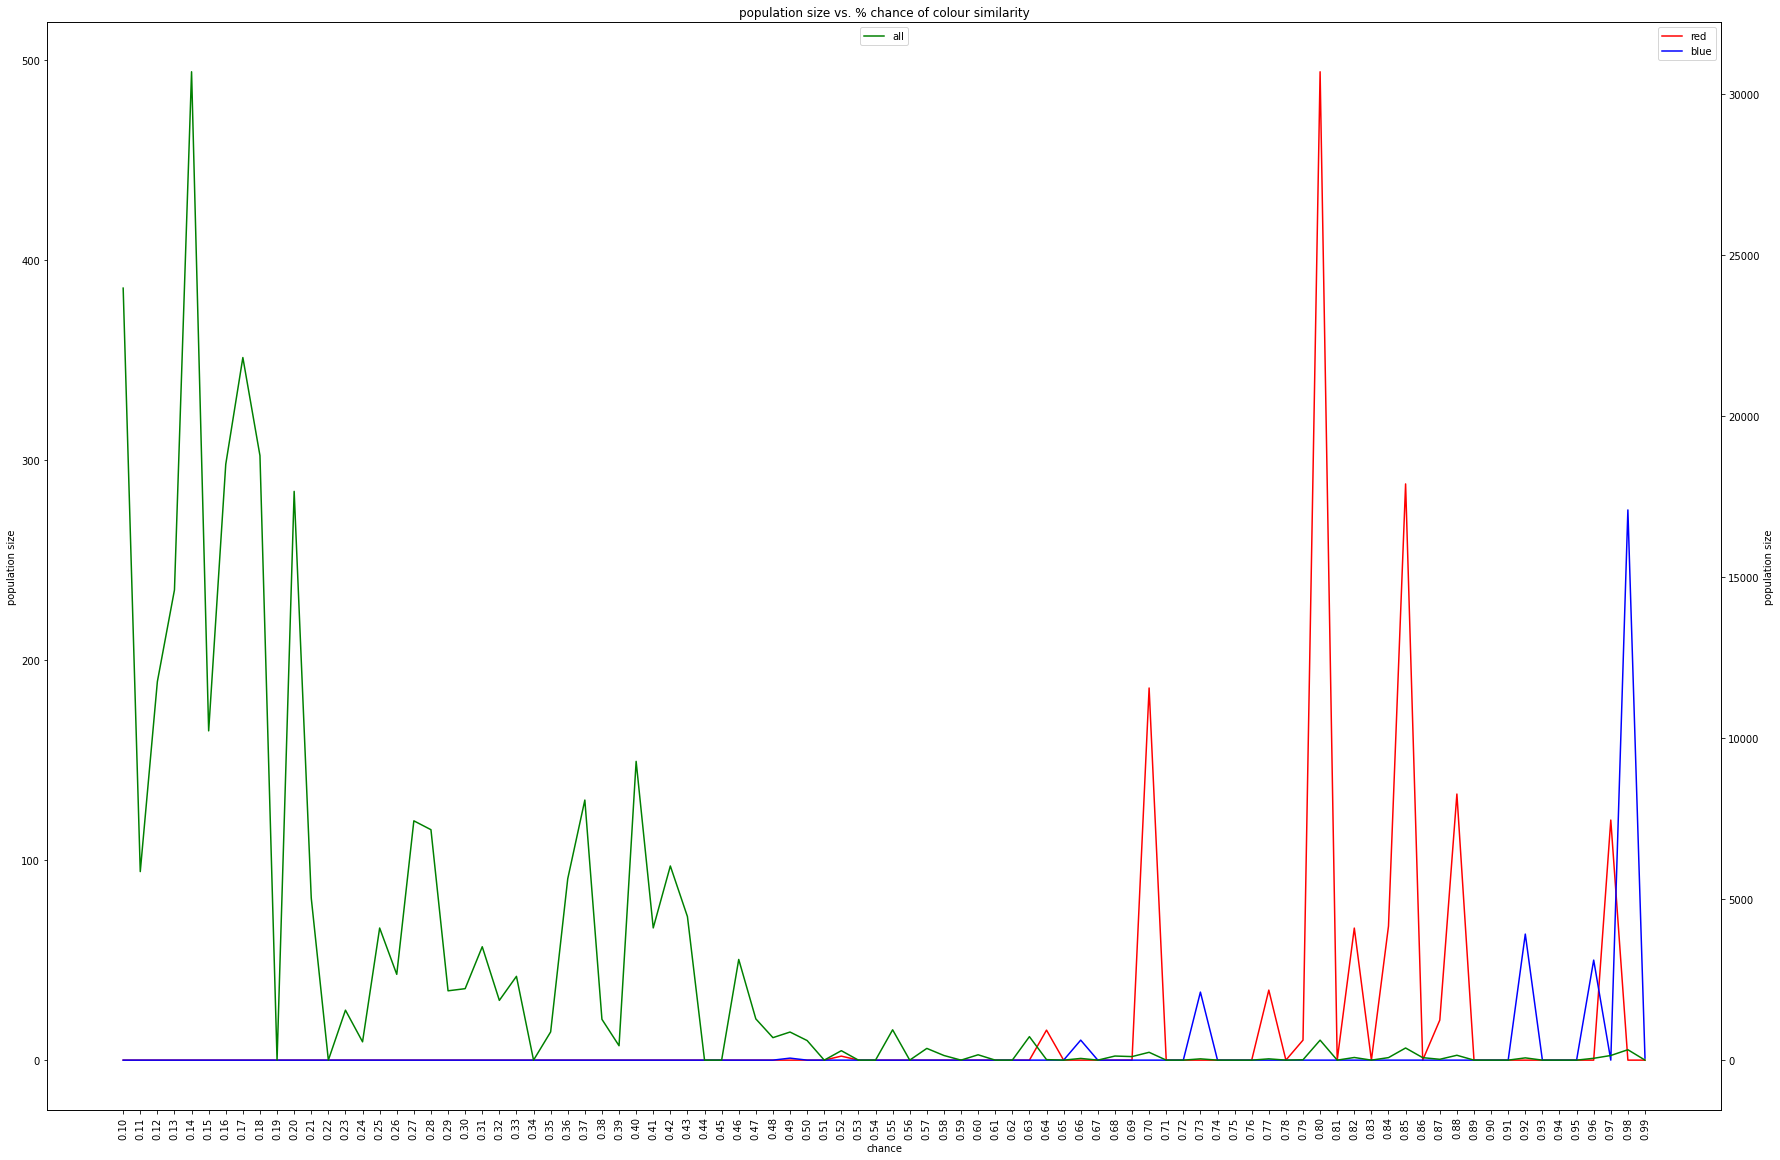

In [263]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(list_color_chance[:], list_evo_3[:,0], label="red",color= 'r')
ax.plot(list_color_chance[:], list_evo_3[:,1], label="blue",color='b')
ax.set_xlabel("chance")
ax.set_xticks(list_color_chance)
ax.set_ylabel("population size")
ax.legend(loc='best')
ax.set_title("population size vs. % chance of colour similarity")


ax2=ax.twinx()
ax2.plot(list_color_chance[:], list_evo_3[:,2], label="all",color='g')
ax2.set_ylabel("population size")
ax.set_title("population size vs. % chance of colour similarity")
ax2.legend(loc='upper center')


ax.xaxis.set_tick_params(rotation=90)
plt.show()





Z wykresu wynika, że dopiero powyżej 50% szans podobieństwa kolorów do końca litreacji zachowują się nie duże grupy czerwonych i niebieskich stworznek.

In [273]:
list_color_chance_2=np.arange(0.5,1,0.01).tolist()
list_death_chance_2=np.arange(0.05,0.15,0.01).tolist()
list_live_chance_2=np.arange(0.2,0.5,0.05).tolist()

tercet_list=[]

for i in itertools.product(list_death_chance_2,list_live_chance_2,list_color_chance_2): # the combination of all the coefficients of interest
  tercet_list.append(i)

tercet_list=np.array(tercet_list) 

list_evo_3_v1 = []
for i in tercet_list:
    score=evolution_simulation_3(65,i[0],i[1],i[2])
    list_evo_3_v1.append(score)
list_evo_3_v1=np.array(list_evo_3_v1) 

zip_list=np.stack((list_evo_3_v1, tercet_list), axis=1)

red_blue_chances= [] # selects only those coefficients for which the red and blue values are greater than 1
for i in zip_list:
   if i[0][0] and i[0][1] >0:
     red_blue_chances.append(i)

red_blue_chances=np.array(red_blue_chances)

red_blue_all,chances = np.rollaxis(red_blue_chances, 1)


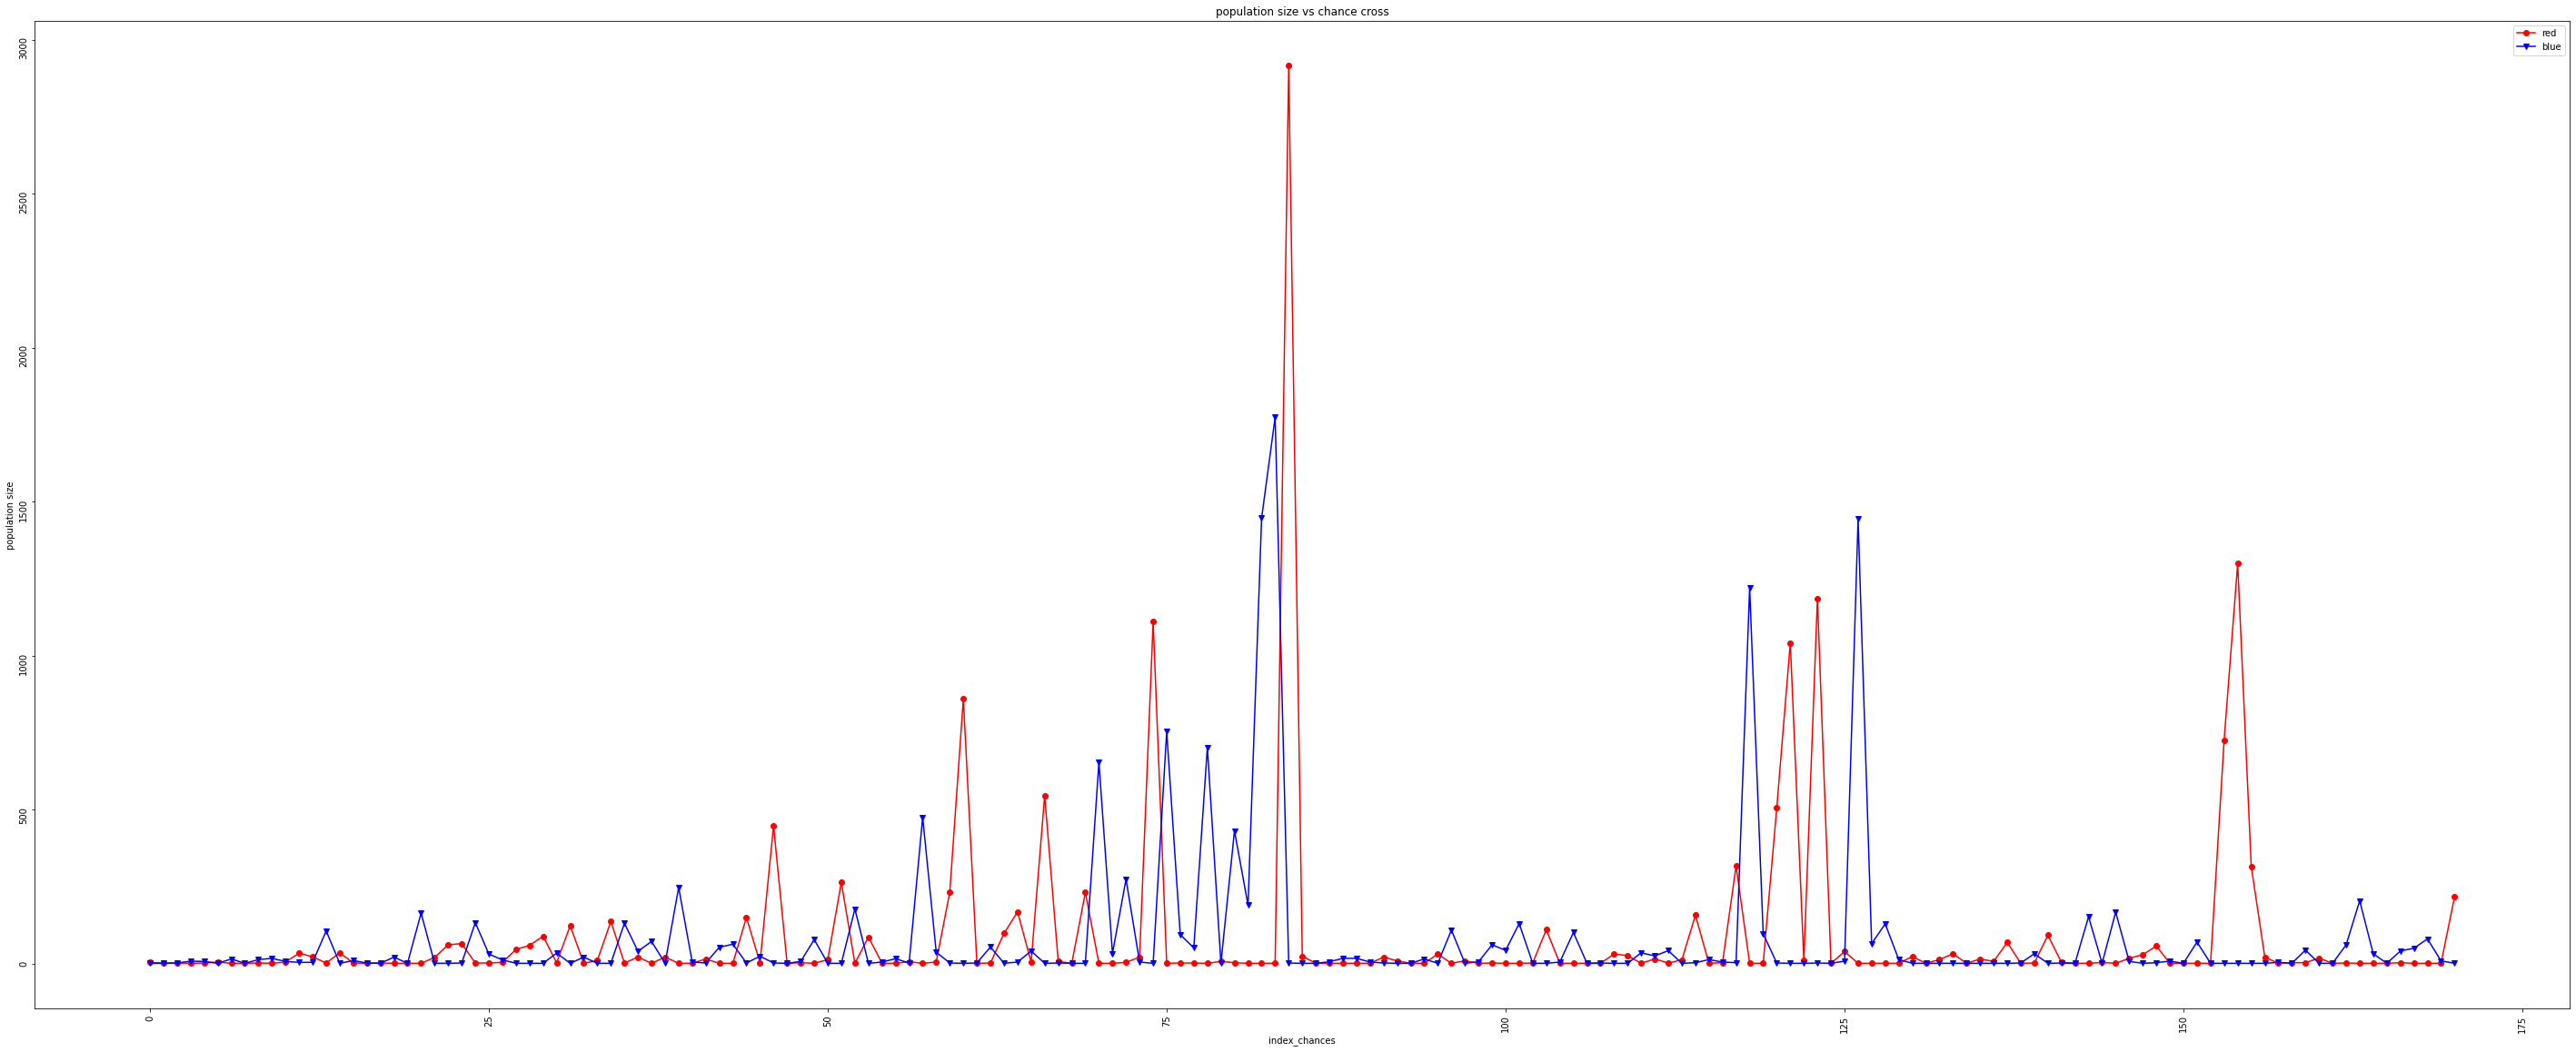

In [274]:
plt.figure(figsize=(50, 20))
plt.plot(range(0,chances.shape[0],1), red_blue_all[:,0], label="red",color= 'r', marker='o')
plt.plot(range(0,chances.shape[0],1), red_blue_all[:,1], label="blue",color='b',marker='v')
# plt.plot(range(0,chances.shape[0],1), red_blue_all[:,2], label="all",color='g')
plt.xlabel("index_chances")
plt.ylabel("population size")
plt.title("population size vs chance cross")
plt.legend(loc='best')
plt.tick_params(rotation=90)
plt.show()

Nie bardzo widać tutaj optymalnych rozkładów czerwonego i niebieskiego. Spróbujmy wykresem słupkowym.

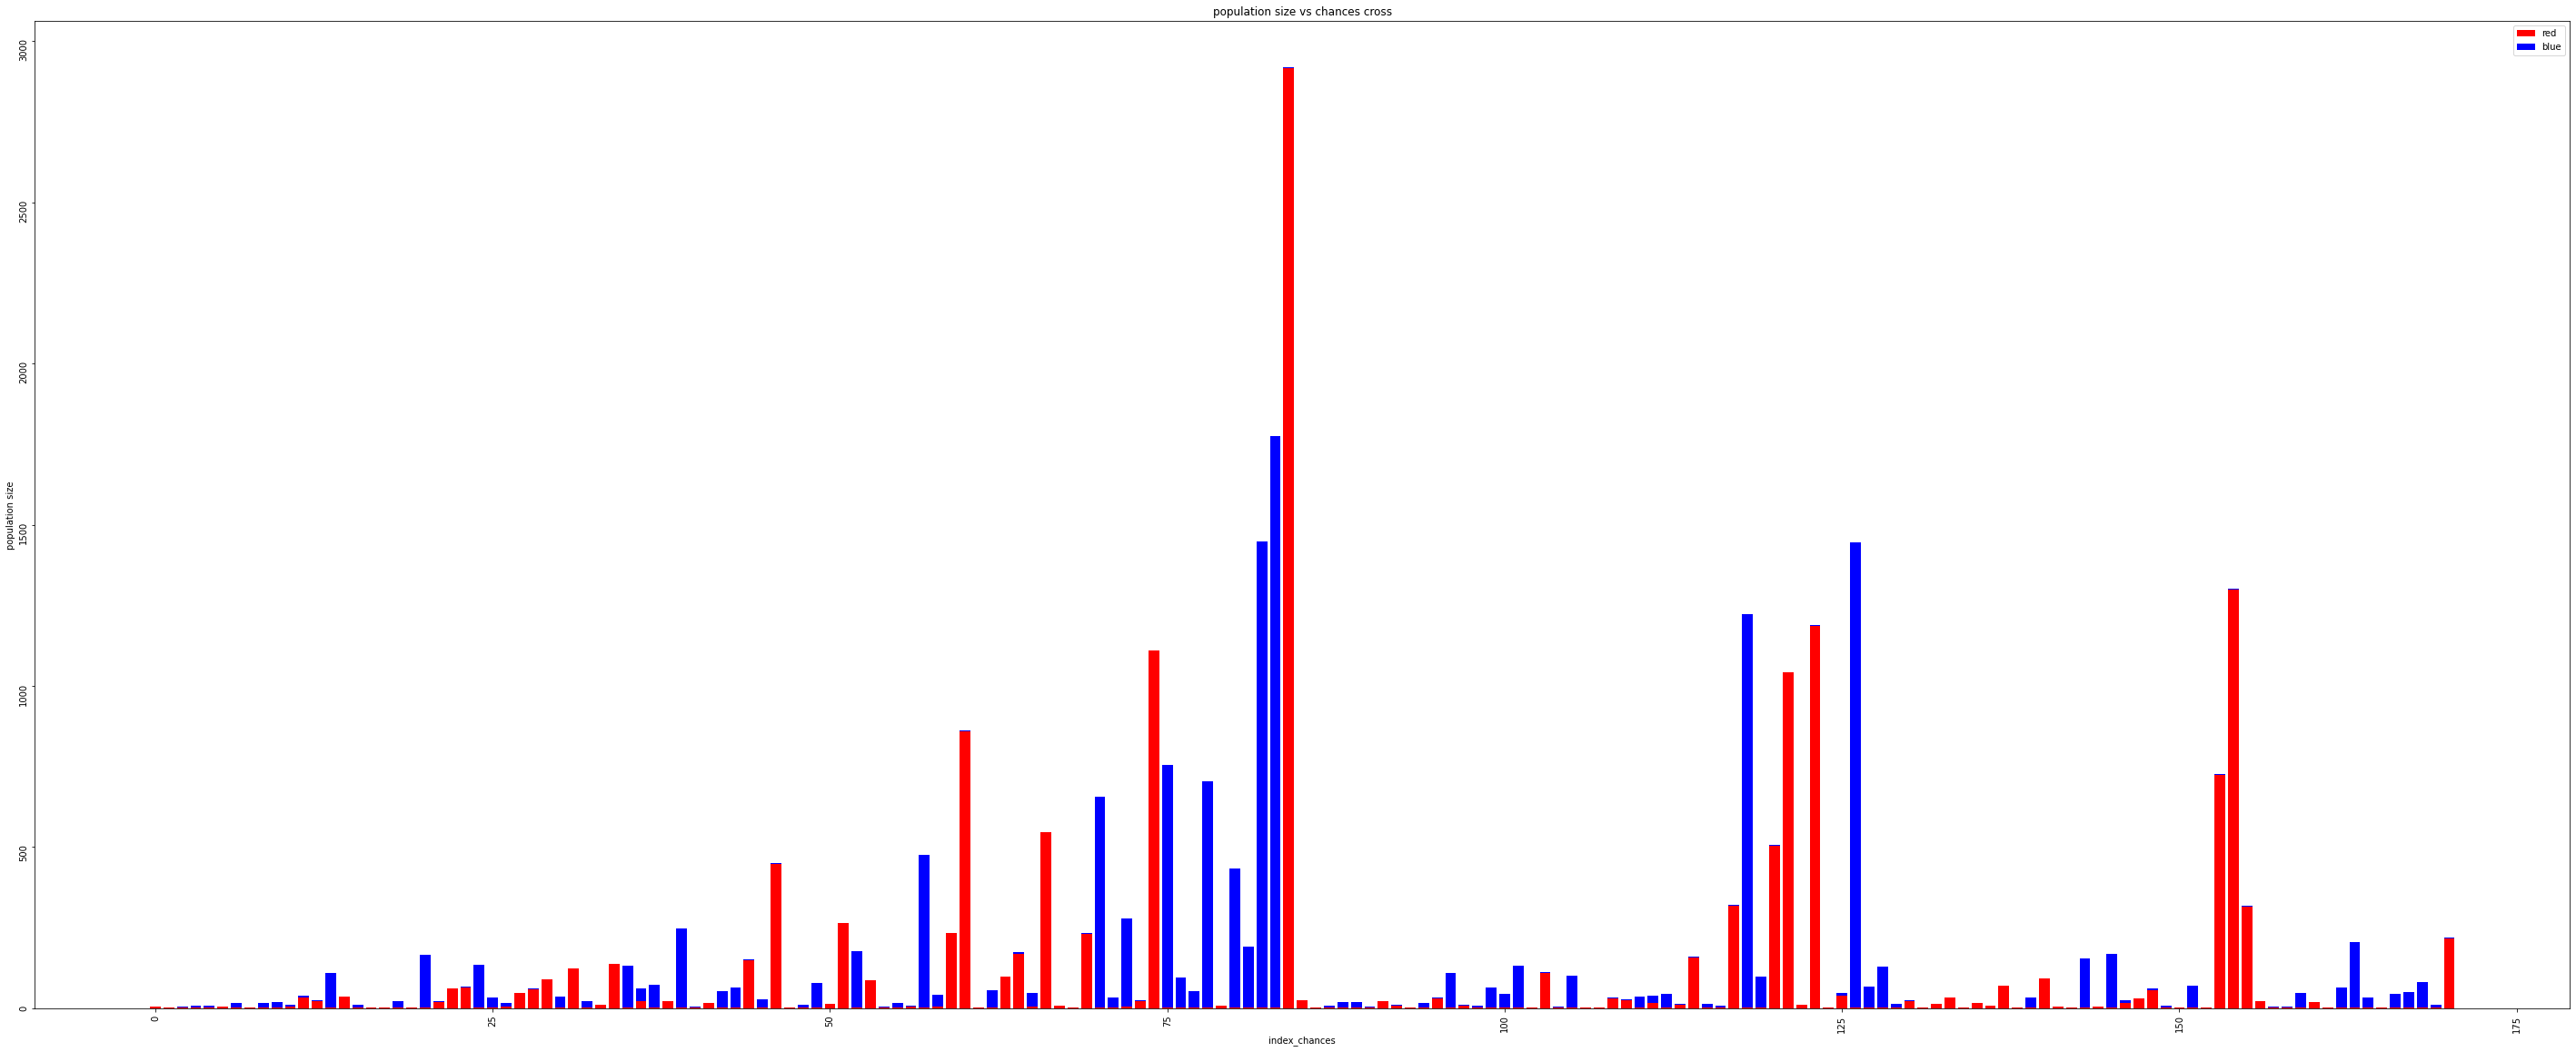

In [275]:
plt.figure(figsize=(50, 20))
plt.bar(range(0,chances.shape[0],1), red_blue_all[:,0], label="red",color= 'r')
plt.bar(range(0,chances.shape[0],1), red_blue_all[:,1],bottom=red_blue_all[:,0], label="blue",color='b')
#plt.plot(range(0,chances.shape[0],1), red_blue_all[:,2], label="all",color='g')
plt.xlabel("index_chances")
plt.ylabel("population size")
plt.title("population size vs chances cross")
plt.legend(loc='best')
plt.tick_params(rotation=90)
plt.show()

całkiem przyzwoite propocje są dla indeksu 111 ale neistety bardzo małe wartości



In [277]:
red_blue_chances[111]

array([[15.  , 25.  , 45.  ],
       [ 0.06,  0.4 ,  0.78]])

In [279]:
#creation a new definition with the return of list, for visualisation
def evolution_simulation_3_v1(n,chance_of_death,chance_of_reproduction,chance_of_similarity): 
  
  import random
  from math import sqrt

  join_lists=[[255, 0, 0],[255, 0, 0],[255, 0, 0],[255, 0, 0],[255, 0, 0], 
              [0, 0, 255],[0, 0, 255],[0, 0, 255],[0, 0, 255],[0, 0, 255]]

  for i in range(n):

    for j in join_lists:
      if random.random() <= chance_of_death:
          join_lists.remove(j)

    random.shuffle(join_lists)
    random_pairs=[join_lists[i:i + 2] for i in range(0, len(join_lists), 2)]

    if (len(join_lists) % 2) == 0:
      for i in random_pairs:
        if random.random() <= chance_of_reproduction:
          if 1-(int(sqrt((i[0][0]-i[1][0])**2+(i[0][1]-i[1][1])**2+(i[0][2]-i[1][2])**2))/ #colour similarity formula
                int(sqrt((255)**2+(255)**2+(255)**2))) >= chance_of_similarity:
            if random.random() <= 0.15: # mutation 15% chance      
              join_lists.append([random.randint(0,255),
                                 random.randint(0,255),
                                 random.randint(0,255)])
            else:
              join_lists.append([(i[0][0]+i[1][0])//2,
                                 (i[0][1]+i[1][1])//2,
                                 (i[0][2]+i[1][2])//2])
    else:
      for i in random_pairs[:-1]:
        if random.random() <= chance_of_reproduction:
          if 1-(int(sqrt((i[0][0]-i[1][0])**2+(i[0][1]-i[1][1])**2+(i[0][2]-i[1][2])**2))/
                int(sqrt((255)**2+(255)**2+(255)**2))) >= chance_of_similarity:
            if random.random() <= 0.15:
              join_lists.append([random.randint(0,255),
                                 random.randint(0,255),
                                 random.randint(0,255)])
            else:
              join_lists.append([(i[0][0]+i[1][0])//2,
                                 (i[0][1]+i[1][1])//2,
                                 (i[0][2]+i[1][2])//2])
  

  return join_lists

In [316]:
evo = evolution_simulation_3_v1(100, 0.06,  0.4 ,  0.78)
len(evo)

7622

In [317]:
if len(evo)%2 == 0:
  evo_tensor=np.array([evo])
else:
  evo_tensor=np.array([evo[:-1]])
evo_tensor.shape

(1, 7622, 3)

In [318]:
z=[]
for x in range(1,evo_tensor.shape[1]+1): #change tesnor shape for better colour visualisation
  if evo_tensor.shape[1]%x==0:
    z.append(x)
x=z[len(z)//2]
y=(evo_tensor.shape[1])//z[len(z)//2]
evo_tensor_2=evo_tensor.reshape((x,y,3))
evo_tensor_2.shape

(103, 74, 3)

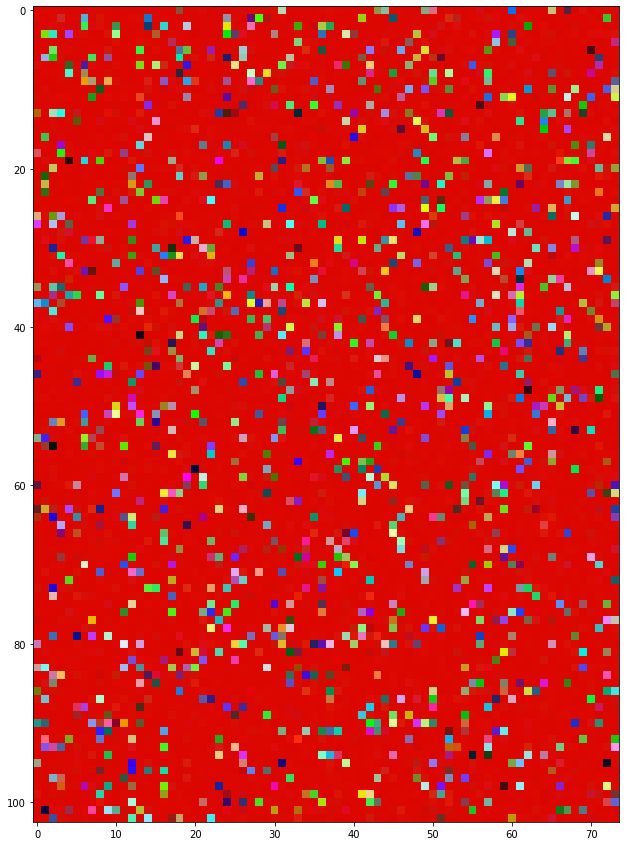

In [319]:
plt.figure(figsize=(15, 15))
plt.imshow(evo_tensor_2)
plt.show()

# Podsumowanie zadania 3

Populacja spada wraz z wzrostem parametru podobieństwa kolorów, ale zachowują sie czerwone i niebieskie stworzenia, im niższy parametr tym udział mutantów jest większy. 

Wydawało mi sie że, znalazłem w poprzednich analizach parametry które by zapewniały optymalny rozwój, ale niestety (jak to widać na ostatniej wizualizacji) wygląda na to że symulacja zawsze będzie faforyzować albo czerwone albo niebieskie stworzonka w przypadku wysokiego współczynnika podobieństwa kolorów, dla niskiego współczynnika faworyzuje  mieszańców :(